| Document : 2023-003-01 (2023) |
| :- |
| [![Le Baladin](https://img.shields.io/badge/Le_baladin-Collinder_399_in_Vulpecula_constellation-blue.svg)](https://sites.google.com/view/astronomie-ut1/accueil)|

**Préface.** La deuxième cible pour l'utilisation du Star Analyser SA200 pour l'été 2022 se portait sur l’amas ou plutôt groupe d’étoile Cl 399 ( Collinder 399 ), celui ci se trouve à la limite de la constellation de Petit Renard dont il fait partie et de la constellation de la Flèche. La magnitude des étoiles cibles étaient parfaites et quelques unes étaient bien en limite de perception pour l’instrument, de plus deux étoiles ont un type bien particulier HD 183537 variable Be et HD 182955 de type M ou K. Encore une fois le temps était au plus beau et la Lune ne génait pas les observations.

**Mots-clés.** Groupe d’étoiles - Spectre - Star Analyser SA200 - Etoile * Be - Type spectral M et K

| ![preview](https://github.com/dtouzan/preview/blob/main/logo.png?raw=true) |
| :--: |

[![astropy](http://img.shields.io/badge/powered%20by-AstroPy-orange.svg?style=flat)](http://www.astropy.org/)
[![JupyterLab](http://img.shields.io/badge/powered%20by-JupyterLab-orange.svg?style=flat)](https://jupyter.org/)
[![Siril](http://img.shields.io/badge/Software-Siril_1.0.5-orange.svg?style=flat)](https://siril.org/)
[![cds](http://img.shields.io/badge/CDS-Database-green.svg?style=flat)](http://cdsportal.u-strasbg.fr/)

### Programme et dataset

In [1]:
import warnings
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from matplotlib import colors
import matplotlib.gridspec as gridspec
import numpy as np
from astropy import wcs
from astropy.io import fits
from astropy.utils.exceptions import AstropyWarning
from astropy.visualization import quantity_support
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.wcs.utils import skycoord_to_pixel
import pandas as pd
import ciboulette.base.ciboulette as Cbl
from ciboulette.utils.archive import Archive
from ciboulette.spectrum import sa200
import ciboulette.base.constant as C

quantity_support()
warnings.simplefilter('ignore', category=AstropyWarning)

cbl = Cbl.Ciboulette()

- Edition de l'image de Collinder 399 du 02/10/2022 fait avec l'obectif Samyang 85 F1.4 mis à F3, le filtre Astronomik IR-CUT et la camera CCD Atik 383L+. Le temps d'intégration cumulé est d'une heure trente minutes.

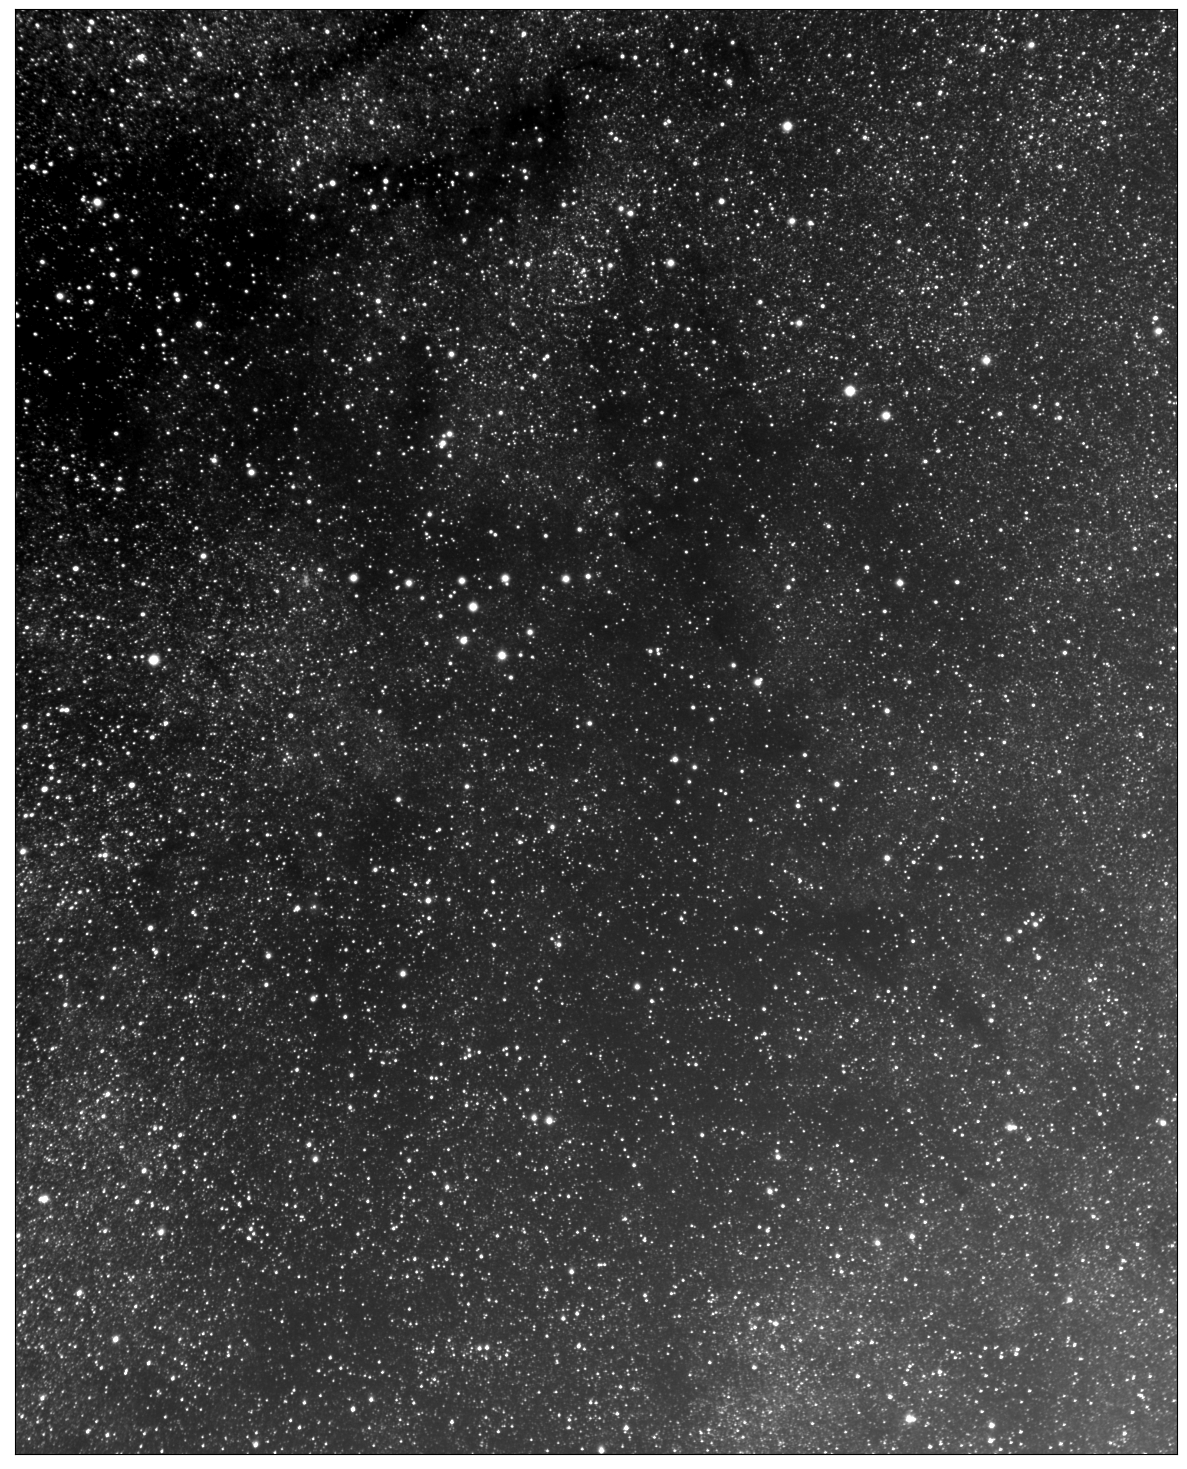

In [5]:
datafits = 'dataset/archives/CI399-20221002-1908-16x300s-f85.fits'
fig, ax = plt.subplots(figsize=(15, 40))
image_data = fits.getdata(datafits, ext=0)
mean = np.mean(image_data)
ax.imshow(image_data, cmap='gray', vmin = mean - 8000, vmax = mean + 30000, origin = 'lower')
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.savefig("output_1.jpg", dpi=150, bbox_inches='tight', pad_inches=0)
plt.show()

### Carte de champ Cl 399
- Le fichier "Collinder399_data.xlsx" contient les treize étoiles répertoriées (données C.D.S).

In [2]:
df = pd.read_excel ('Collinder399_data.xlsx')

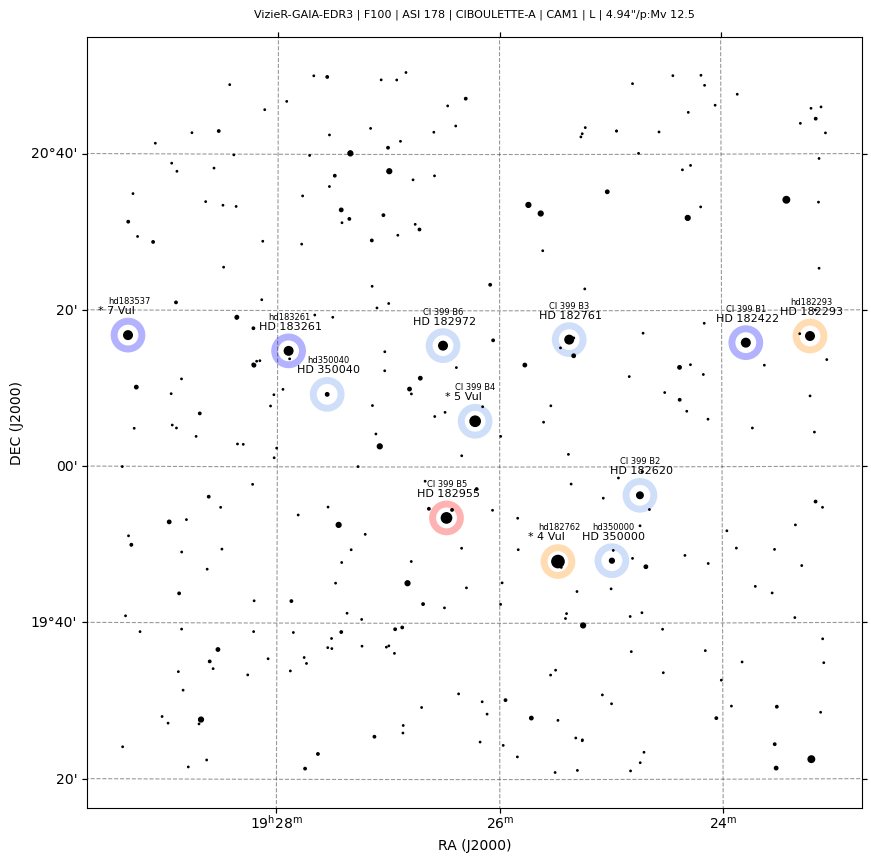

In [3]:
cbl.focal = 100
cbl.asi178

figure = plt.figure(figsize=(10,10))

cbl.positionsbyname = 'hd 182919'
cbl._date = '2022-09-06T20:45:00'
P = cbl.projections
P.title = 'Collinder 399'
M = cbl.starsmap
axes = figure.add_subplot(1,1,1,projection = M.WCS) # renvoie un objet Axes

for hd in df.index:
    if df.loc[hd,'Henry Draper catalog'] != 'hd181934':
        if 'B' in df.loc[hd,'Type spectral']:
            color = 'blue'
        if 'A' in df.loc[hd,'Type spectral']:
            color = 'cornflowerblue'
        if 'K' in df.loc[hd,'Type spectral']:
            color = 'darkorange'  
        if 'M' in df.loc[hd,'Type spectral']:
            color = 'red' 
        name = df.loc[hd,'ID']
        c_hd = SkyCoord(df.loc[hd,'ICRS (J2000) RA'],df.loc[hd,'ICRS (J2000) DEC'], unit=(u.hourangle, u.deg))
        ref = SkyCoord(df.loc[hd,'ICRS (J2000) RA'],df.loc[hd,'ICRS (J2000) DEC'],unit=(u.hourangle, u.deg), frame='icrs')
        x,y = skycoord_to_pixel(ref,M.WCS)

        axes.scatter(c_hd.ra, c_hd.dec, transform=axes.get_transform('icrs'), s=400, edgecolor=color, linewidths=5, facecolor='none', alpha=0.3)
        if df.loc[hd,'Collinder 399'] != 'HD':
            Cl_name = df.loc[hd,'Collinder 399']
            axes.annotate(f'{Cl_name}', xy=(x, y),  xytext=(-20,30), textcoords='offset pixels', ha='left', va='bottom',size=6)

        axes.annotate(f'{name}', xy=(x, y),  xytext=(-30,20), textcoords='offset pixels', ha='left', va='bottom',size=8)
    
M.plot(axes)
plt.savefig("output_2.jpg", dpi=150, bbox_inches='tight', pad_inches=0.2)
plt.show()

### Carte de champ de HD181934

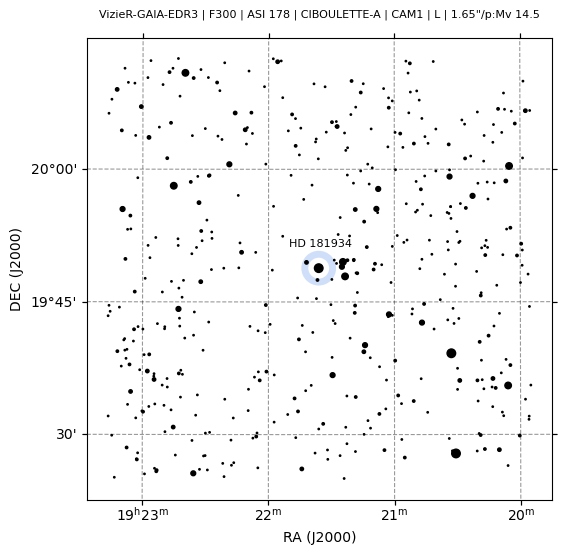

In [25]:
cbl.lens70_300 = 300
cbl.asi178
figure = plt.figure(figsize=(6,6))

cbl.positionsbyname = 'hd 181934'
cbl._date = '2022-09-06T20:45:00'
M = cbl.starsmap
axes = figure.add_subplot(1,1,1,projection = M.WCS) # renvoie un objet Axes

for hd in df.index:
    if df.loc[hd,'Henry Draper catalog'] == 'hd181934':
        name = df.loc[hd,'ID']
        if 'B' in df.loc[hd,'Type spectral']:
            color = 'blue'
        if 'A' in df.loc[hd,'Type spectral']:
            color = 'cornflowerblue'
        if 'K' in df.loc[hd,'Type spectral']:
            color = 'darkorange'  
        if 'M' in df.loc[hd,'Type spectral']:
            color = 'red' 

        c_hd = SkyCoord(df.loc[hd,'ICRS (J2000) RA'],df.loc[hd,'ICRS (J2000) DEC'], unit=(u.hourangle, u.deg))
        axes.scatter(c_hd.ra, c_hd.dec, transform=axes.get_transform('icrs'), s=400, edgecolor=color, linewidths=5, facecolor='none', alpha=0.3)
        ref = SkyCoord(df.loc[hd,'ICRS (J2000) RA'],df.loc[hd,'ICRS (J2000) DEC'],unit=(u.hourangle, u.deg), frame='icrs')
        x,y = skycoord_to_pixel(ref,M.WCS)
        axes.annotate(f'{name}', xy=(x, y),  xytext=(-30,20), textcoords='offset pixels', ha='left', va='bottom',size=8)
        
M.plot(axes)
plt.savefig("output_3.jpg", dpi=150, bbox_inches='tight', pad_inches=0.2)
plt.show()

### Cl 399 photométrie
- Correspondance de l'étoile de type M0III avec le catalogue Gaia DR3 (données C.D.S). Cl 399 B5 se trouve plutôt dans la région K. Le fichier d'étoiles "Cl399_vizieR.xlsx" est une extration de la zone (3°) autour de Cl 399 fait avec l'applcation Aladin 

In [14]:
#ZAMS = pd.read_excel ('ZAMS.xlsx')
cloud = pd.read_excel ('Cl399_vizieR.xlsx')

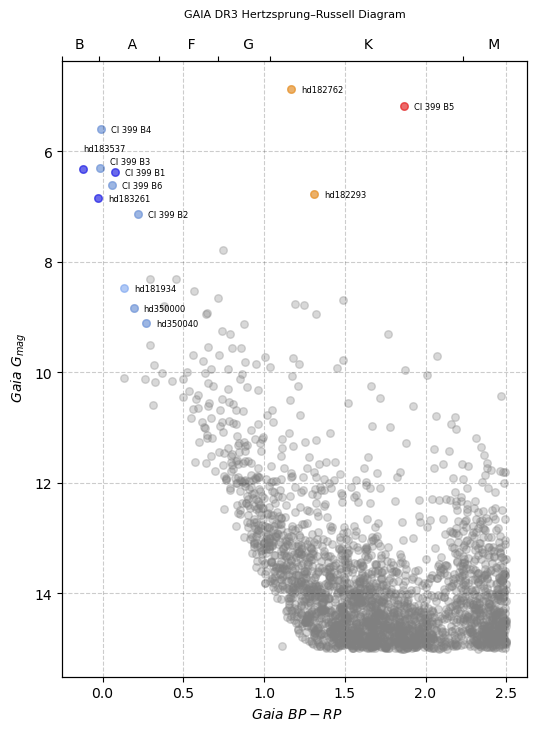

In [23]:
from scipy.interpolate import make_interp_spline

figure = plt.figure(figsize=(6,8))
axes = figure.add_subplot(1,1,1) # renvoie un objet Axes
axes2 = axes.twiny()
axes.grid(visible = True, linestyle = '--', color = 'black', alpha = 0.2)
plt.gca().invert_yaxis()

axes.scatter(cloud['BP-RP'], cloud['Gmag'], s=30, edgecolor='gray', linewidths=None, facecolor='gray', alpha=0.3)

ytext = -5
for hd in df.index:
    name = df.loc[hd,'Collinder 399']
   
    if 'B' in df.loc[hd,'Type spectral']:
        color = 'blue'
    if 'A' in df.loc[hd,'Type spectral']:
        color = 'cornflowerblue'
    if 'K' in df.loc[hd,'Type spectral']:
        color = 'darkorange'  
    if 'M' in df.loc[hd,'Type spectral']:
        color = 'red' 

    ytext = -5
    xtext = 10
    if 'B3' in name :
        ytext = 2
    if 'hd183537' in name :
        ytext = 15
        xtext = 0
    axes.annotate(f'{name}', xy=(df.loc[hd,'BP-RP'], df.loc[hd,'Gmag']),  xytext=(xtext,ytext), textcoords='offset pixels', ha='left', va='bottom',size=6)           
    axes.scatter(df.loc[hd,'BP-RP'], df.loc[hd,'Gmag'], s=30, edgecolor=color, linewidths=None, facecolor=color, alpha=0.5)

spectral_tick_locations = np.array([-.5, -0.25, 0.15, 0.55, 0.90, 2.20])
axes2.set_xlim(axes.get_xlim())
axes2.set_xticks(spectral_tick_locations)
axes2.set_xticklabels(['        B','               A','               F','              G','                                             K','              M'])
axes.set_title('GAIA DR3 Hertzsprung–Russell Diagram\n', fontsize = 8)
axes.set_xlabel(r'$\ Gaia\ BP-RP$')
axes.set_ylabel(r'$\  Gaia\ G_{mag}$')
plt.savefig("output_4.jpg", dpi=150, bbox_inches='tight', pad_inches=0.5)
plt.show()

- Edition de l'image de Collinder 399 du 03/07/2022 fait avec l'obectif Tokina SZX400 F8, le filtre Astronomik "L" et la camera CCD Atik 383L+. Le temps d'intégration cumulé est d'une quarentaine de minutes.

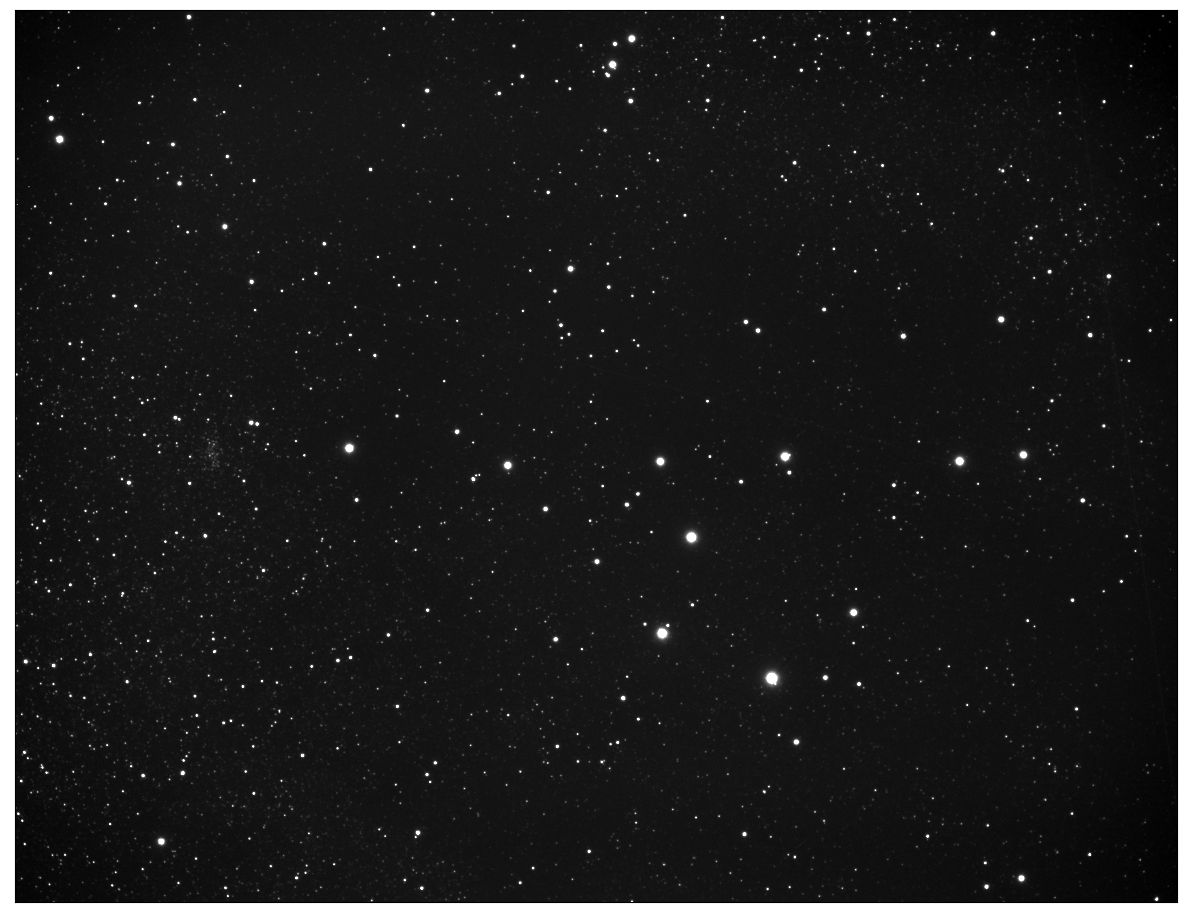

In [16]:
datafits = 'dataset/archives/Cl399-20220703-2152-13x180s-f400.fits'
fig, ax = plt.subplots(figsize=(15, 40))
image_data = fits.getdata(datafits, ext=0)
mean = np.mean(image_data)
ax.imshow(image_data, cmap='gray', vmin = mean - 100, vmax = mean + 1000, origin = 'lower')
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.savefig("output_5.jpg", dpi=150, bbox_inches='tight', pad_inches=0)
plt.show()

### Cl 399 Spectres

- Edition de l'image de Collinder 399 du 06/09/2022 fait avec le spectrographe, obectif Canon 200mm mis à F5.2, le filtre Astronomik IR-CUT, le Star Analyser SA200 et la caméra CMOS ZWO ASI 178MM. Le temps d'intégration est de 120 secondes, une image médiane est réalisée avec une serie de 7 prises de vue.

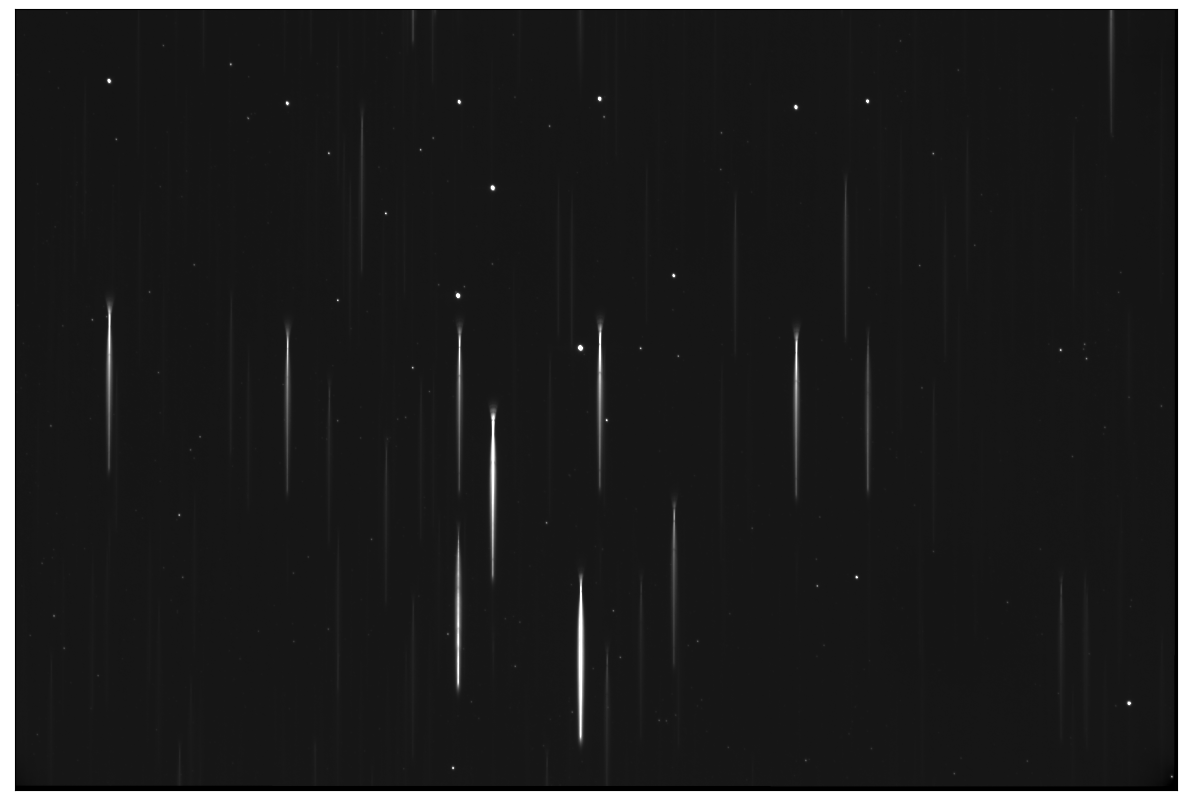

In [17]:
datafits = 'dataset/archives/sCL399-20220906-2047-1x120s-f200.fits'
fig, ax = plt.subplots(figsize=(15, 40))
image_data = fits.getdata(datafits, ext=0)
mean = np.mean(image_data)
ax.imshow(image_data, cmap='gray', vmin = mean - 2000, vmax = mean + 20000, origin = 'lower')
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.savefig("output_6.jpg", dpi=150, bbox_inches='tight', pad_inches=0)
plt.show()

In [2]:
dataset = ( 'dataset/dbspectre/Pn_hd181934_20220906_866.fits',
            'dataset/dbspectre/Pn_hd350000_20220906_866.fits',
            'dataset/dbspectre/Pn_hd350040_20220906_866.fits',
            'dataset/dbspectre/Pn_hd182620_20220906_858.fits',
            'dataset/dbspectre/Pn_hd182761_20220906_858.fits',
            'dataset/dbspectre/Pn_hd182919_20220906_858.fits',
            'dataset/dbspectre/Pn_hd182972_20220906_858.fits',
            'dataset/dbspectre/Pn_hd183261_20220906_858.fits',
            'dataset/dbspectre/Pn_hd183537_20220906_858.fits',
            'dataset/dbspectre/Pn_hd182422_20220906_858.fits',
            'dataset/dbspectre/Pn_hd182293_20220906_866.fits',         
            'dataset/dbspectre/Pn_hd182762_20220906_858.fits',
            'dataset/dbspectre/Pn_hd182955_20220906_858.fits' )

- Lecture des fichiers fits des spectres

In [12]:
dataset = ( 'dataset/dbspectre/Cn_hd181934_20220906_866.fits',
                 'dataset/dbspectre/Cn_hd350000_20220906_866.fits',
                 'dataset/dbspectre/Cn_hd350040_20220906_866.fits',
                 'dataset/dbspectre/Cn_hd182620_20220906_858.fits',
                 'dataset/dbspectre/Cn_hd182761_20220906_858.fits',
                 'dataset/dbspectre/Cn_hd182919_20220906_858.fits',
                 'dataset/dbspectre/Cn_hd182972_20220906_858.fits',
                 'dataset/dbspectre/Cn_hd183261_20220906_858.fits',
                 'dataset/dbspectre/Cn_hd183537_20220906_858.fits',
                 'dataset/dbspectre/Cn_hd182422_20220906_858.fits',
                 'dataset/dbspectre/Cn_hd182762_20220906_858.fits',
                 'dataset/dbspectre/Cn_hd182293_20220906_866.fits',         
                 'dataset/dbspectre/Cn_hd182955_20220906_858.fits' )

In [4]:
table_sa200 = []
for file in dataset:
    table_sa200.append(sa200.SA200(file))

- Configuration des données des longeurs d'onde, du traitement Isis, des images des spectres et des champs d'étoiles 

In [5]:
# Serie de balmer
Hd = 4101,73               # BLUE COLOR
Hg = 4340.46               # BLUE COLOR
Hb = 4861.32               # CYAN COLOR
Ha = 6562.10               # RED COLOR
# Raie Wolf-Rayet
HII_1 = 4686               # BLUE COLOR
HII_2 = 5411               # GREEN COLOR
CIII = 5696                # YELLOW COLOR
CIV = 5800                 # ORANGE COLOR
   

- Edition des spectres.

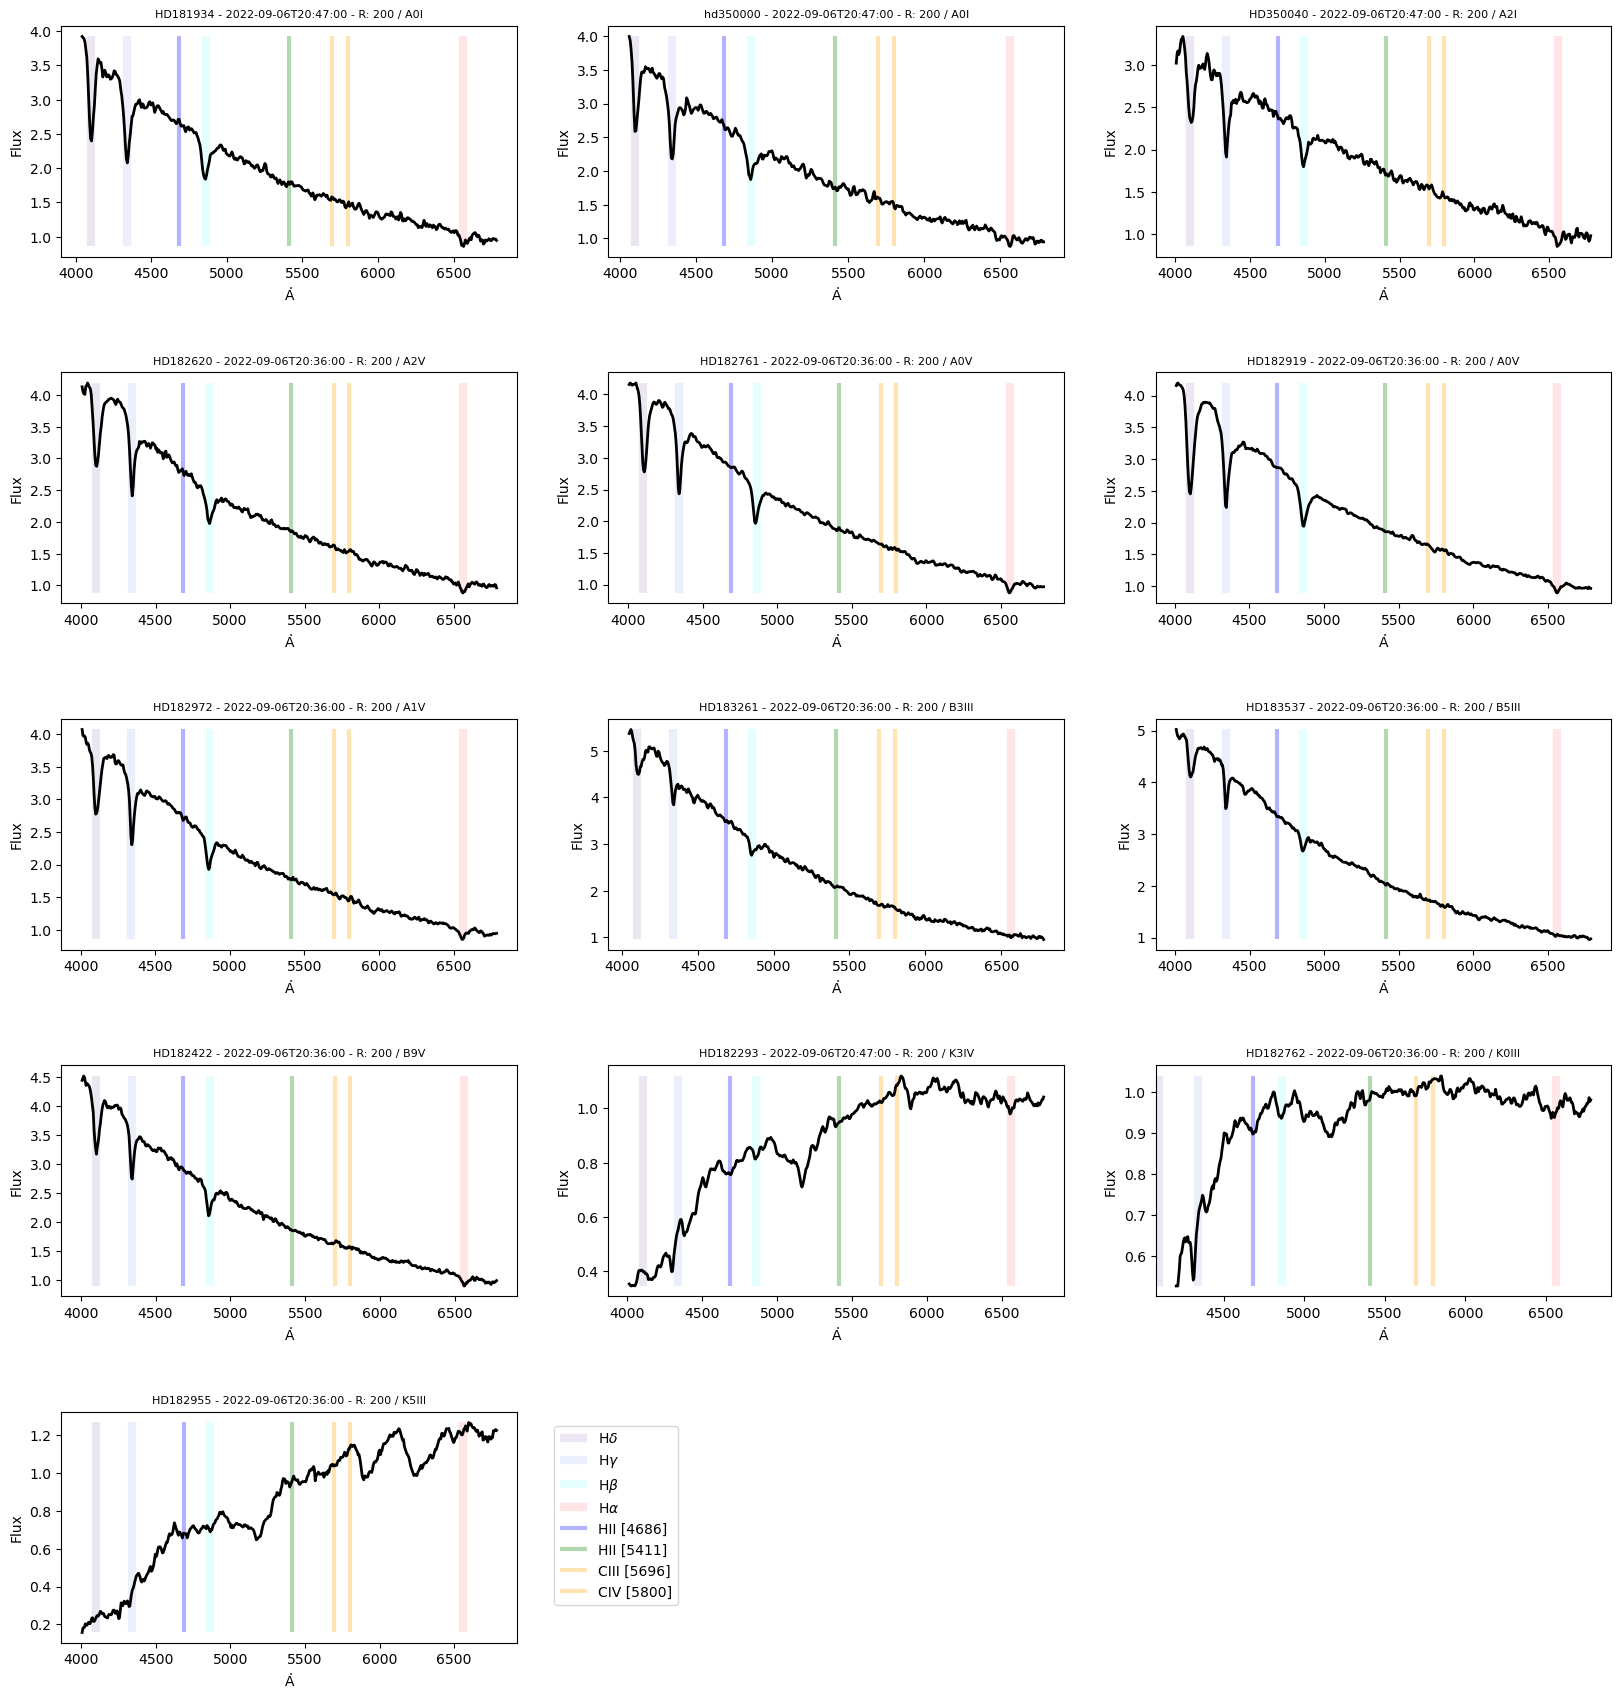

In [10]:
import matplotlib.gridspec as gridspec
figure = plt.figure(figsize=(20, 30))
gs = gridspec.GridSpec(7, 3, height_ratios=[1,1,1,1,1,1,1], width_ratios=[1,1,1], hspace=0.5)

index = 0
for g in gs :
    if index < 13 :
        ax = figure.add_subplot(g)
        ax.set_title(table_sa200[index].title, fontsize=8)
        #ax.set_ylim([0.5,1.4])
        li = min(table_sa200[index].s1d.flux)
        lm = max(table_sa200[index].s1d.flux)
        ax.vlines(Hd, li, lm, linewidths=6, linestyles = 'solid', colors = 'indigo', alpha = 0.1, label = r'H$\delta$')
        ax.vlines(Hg, li, lm, linewidths=6, linestyles = 'solid', colors = 'royalblue', alpha = 0.1, label = r'H$\gamma$')
        ax.vlines(Hb, li, lm, linewidths=6, linestyles = 'solid', colors = 'cyan', alpha = 0.1, label = r'H$\beta$')
        ax.vlines(Ha, li, lm, linewidths=6, linestyles = 'solid', colors = 'red', alpha = 0.1, label = r'H$\alpha$')
        ax.vlines(HII_1, li, lm, linewidths=3, linestyles = 'solid', colors = 'blue', alpha = 0.3, label = r'HII [4686]')
        ax.vlines(HII_2, li, lm, linewidths=3, linestyles = 'solid', colors = 'green', alpha = 0.3, label = r'HII [5411]')
        ax.vlines(CIII, li, lm, linewidths=3, linestyles = 'solid', colors = 'orange', alpha = 0.3, label = r'CIII [5696]')
        ax.vlines(CIV, li, lm, linewidths=3, linestyles = 'solid', colors = 'orange', alpha = 0.3, label = r'CIV [5800]')
        ax.plot(table_sa200[index].s1d.spectral_axis, table_sa200[index].s1d.flux, linewidth=2, color = 'black')
        ax.set_ylabel('Flux'.format(table_sa200[0].s1d.flux.unit))
        if index == 12 :
            ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=1)
    index += 1
plt.savefig("output_7.jpg", dpi=150, bbox_inches='tight', pad_inches=0)    
plt.show()


### HD182955 M ou K
- Le spectre de cette étoile ressemble plus au spectre de type K5

In [32]:
dataset = ( 'dataset/dbspectre/Pn_hd182955_20220906_858.fits',
            'dataset/dbspectre/ref-K5III.fits',
            'dataset/dbspectre/ref-M0III.fits' )

table_sa200 = []
for file in dataset:
    table_sa200.append(sa200.SA200(file))

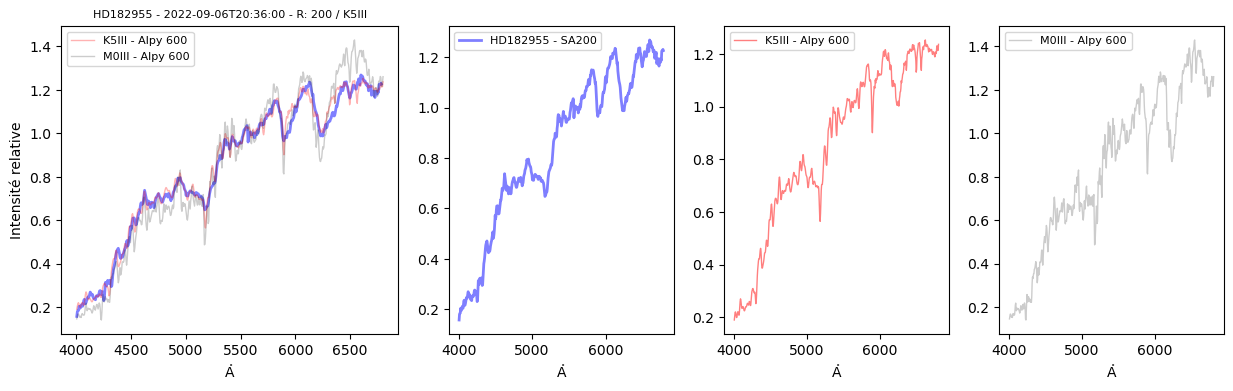

In [34]:
figure = plt.figure(figsize=(15, 4))
gs = gridspec.GridSpec(1, 4, height_ratios=[1], width_ratios=[3,2,2,2], wspace=0.2)

index = 0
for g in gs :
    ax = figure.add_subplot(g)
    if index == 0 :
        ax.set_title(table_sa200[index].title, fontsize=8)
        ax.plot(table_sa200[index].s1d.spectral_axis, table_sa200[index].s1d.flux, color='blue' , linewidth=2, alpha=0.5)
        ax.plot(table_sa200[1].s1d.spectral_axis, table_sa200[1].s1d.flux, color='red' , linewidth=1, alpha=0.3, label='K5III - Alpy 600')
        ax.plot(table_sa200[2].s1d.spectral_axis, table_sa200[2].s1d.flux, color='black' , linewidth=1, alpha=0.2, label='M0III - Alpy 600')
        ax.set_ylabel('Intensité relative'.format(table_sa200[0].s1d.flux.unit))
        ax.legend(fontsize=8)
    if index == 1 :
        ax.plot(table_sa200[index-1].s1d.spectral_axis, table_sa200[index-1].s1d.flux, color='blue' , linewidth=2, alpha=0.5, label='HD182955 - SA200')
        ax.legend(fontsize=8)
    if index == 2 :
        ax.plot(table_sa200[index-1].s1d.spectral_axis, table_sa200[index-1].s1d.flux, color='red' , linewidth=1, alpha=0.5, label='K5III - Alpy 600')
        ax.legend(fontsize=8)
    if index == 3 :
        ax.plot(table_sa200[index-1].s1d.spectral_axis, table_sa200[index-1].s1d.flux, color='black' , linewidth=1, alpha=0.2, label='M0III - Alpy 600')
        ax.legend(fontsize=8)

        
    index += 1
plt.savefig("output_8.jpg", dpi=150, bbox_inches='tight', pad_inches=0.2)    
plt.show()



### Be start *7 Vul (HD183537)
- Pas de raie sinificatif H$\alpha$ retrouvée dans le spectre.

In [15]:
dataset = ( 'dataset/dbspectre/Pn_hd183537_20220906_858.fits',
            'dataset/dbspectre/Cn_hd183537_20220906_858.fits' )

table_sa200 = []
for file in dataset:
    table_sa200.append(sa200.SA200(file))

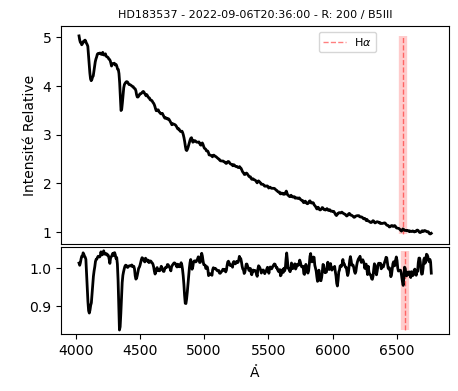

In [16]:
figure = plt.figure(figsize=(5, 4))
gs = gridspec.GridSpec(2, 1, height_ratios=[5,2], width_ratios=[1], hspace=0.02)

index = 0
for g in gs :
    ax = figure.add_subplot(g)
    ax.vlines(Ha, min(table_sa200[index].s1d.flux), max(table_sa200[index].s1d.flux), linewidths=6, linestyles = 'solid', colors = 'red', alpha = 0.2)
    ax.vlines(Ha, min(table_sa200[index].s1d.flux), max(table_sa200[index].s1d.flux), linewidths=1, linestyles = 'dashed', colors = 'red', alpha = 0.5,label = r'H$\alpha$')
    ax.plot(table_sa200[index].s1d.spectral_axis, table_sa200[index].s1d.flux , linewidth=2, color = 'black')
    if index == 0 :
        ax.set_title(table_sa200[index].title, fontsize=8)
        ax.set_ylabel('Intensité Relative'.format(table_sa200[0].s1d.flux.unit))
        ax.set_xlabel(False)
        ax.set_xticks([], [])
        ax.legend(bbox_to_anchor=(0.65, 1), loc='upper left', fontsize=8)

    index += 1
    
plt.savefig("output_9.jpg", dpi=200, bbox_inches='tight', pad_inches=0.2)    
plt.show()


- Table : Données C.D.S. "Gmag" et "BP-RP" sont des valeurs Gaia DR3 

In [3]:
df

ID Henry Draper catalog Collinder 399  \
0   HD 183261              hd183261      hd183261   
1     * 7 Vul              hd183537      hd183537   
2    HD 182422             hd182422     Cl 399 B1   
3   HD 181934              hd181934      hd181934   
4   HD 350000              hd350000      hd350000   
5    HD 182761             hd182761     Cl 399 B3   
6     * 5 Vul              hd182919     Cl 399 B4   
7   HD 182972              hd182972     Cl 399 B6   
8   HD 350040              hd350040      hd350040   
9   HD 182620              hd182620     Cl 399 B2   
10    * 4 Vul              hd182762      hd182762   
11  HD 182293              hd182293      hd182293   
12  HD 182955              hd182955     Cl 399 B5   

                        Gaia DR3                           Type  \
0   Gaia DR3 2017709360072671360       Em* / Emission-line Star   
1   Gaia DR3 2017735817073815680                  Be* / Be star   
2   Gaia DR3 4515955153104002560                              *   
3   Gaia DR3 4515835031450782208                              *   
4   Gaia DR3 4515857777597151616                              *   
5   Gaia DR3 4515911103915737600                              *   
6   Gaia DR3 4515892996332248960                              *   
7   Gaia DR3 2017899953519831168                              *   
8   Gaia DR3 2017707053628901760                             **   
9   Gaia DR3 4515872895883390464                              *   
10  Gaia DR3 4515855716012824704  PM* - High Proper Motion Star   
11  Gaia DR3 4515944295425699200  PM* - High Proper Motion Star   
12  Gaia DR3 4515693812946234112                              *   

        ICRS (J2000) RA     ICRS (J2000) DEC  Mag B  Mag V Type spectral  \
0   19 27 54.0644798304  +20 14 50.580468168  6.833  6.879          B3II   
1   19 29 20.8977162984  +20 16 47.065594296  6.226  6.326          B5Vn   
2   19 23 46.9297779336  +20 15 51.694738020  6.398  6.393         B9.5V   
3   19 21 36.0651832152  +19 48 49.475428272  8.590  8.480            A0   
4   19 24 59.5376729352  +19 47 59.969667228  9.000  8.860            A0   
5   19 25 22.3915776720  +20 16 18.216714108  6.278  6.287           A0V   
6   19 26 13.2462108768  +20 05 51.844661412  5.585  5.591           A0V   
7   19 26 30.6061634928  +20 15 32.364268164  6.625  6.616           A1V   
8         19 27 33.1699        +20 09 17.326  8.990  8.840            A2   
9   19 24 44.3465725152  +19 56 21.932945808  7.287  7.158           A2V   
10  19 25 28.6026797712  +19 47 54.070179072  6.140  5.160         K0III   
11  19 23 12.2158868040  +20 16 40.604334888  8.277  7.105         K3IVp   
12  19 26 28.6865078856  +19 53 29.381827056  7.390  5.870         M0III   

      B-V      Gmag     BP-RP  
0  -0.046  6.853541 -0.028878  
1  -0.100  6.311925 -0.118049  
2   0.005  6.375560  0.076680  
3   0.110  8.478891  0.135182  
4   0.140  8.838958  0.192972  
5  -0.009  6.303237 -0.016312  
6  -0.006  5.594915 -0.008207  
7   0.009  6.618482  0.055727  
8   0.150  9.100685  0.267743  
9   0.129  7.133403  0.221480  
10  0.980  4.868474  1.167106  
11  1.172  6.775223  1.312187  
12  1.520  5.188395  1.866469